In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns # data visualization
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train = pd.read_csv(r'C:\Users\User\Desktop\Kaggle\House Prices\train.csv')
test = pd.read_csv(r'C:\Users\User\Desktop\Kaggle\House Prices\test.csv')

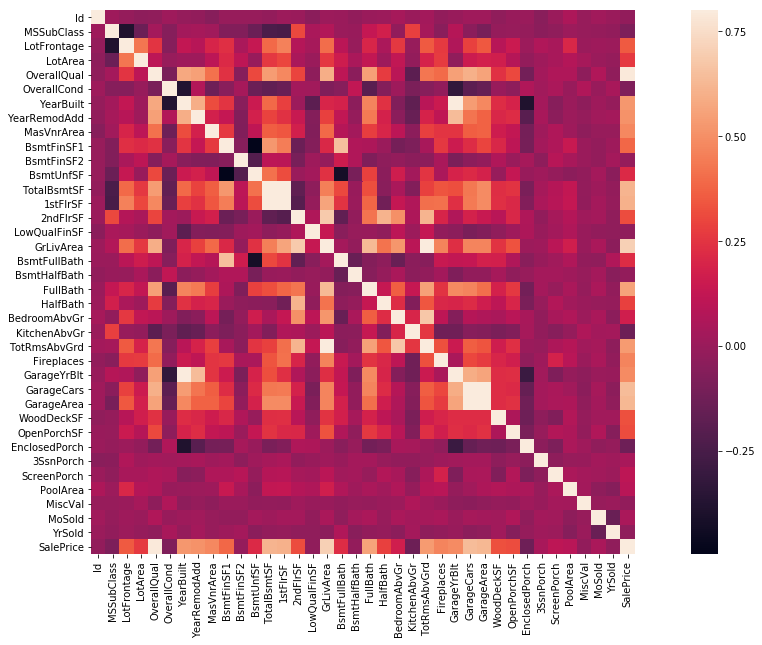

In [3]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

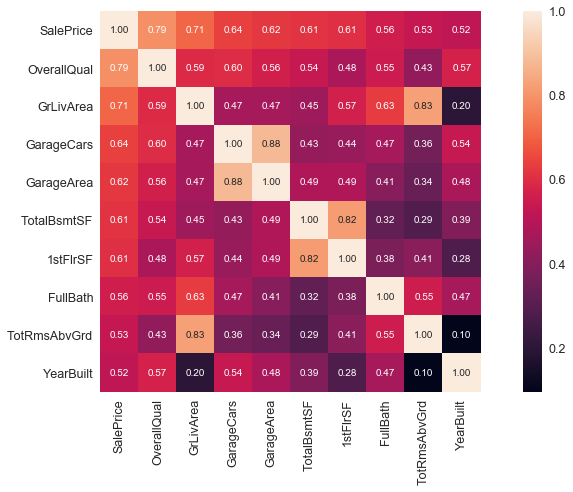

In [4]:
plt.figure(figsize=(15,7))
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [5]:
#Dummies
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [6]:
# Replace NAs with median
train = train.apply(lambda x: x.fillna(x.median()),axis=0)
test = test.apply(lambda x: x.fillna(x.median()),axis=0)

In [7]:
# Aligning both dataframes
train_labels = train['SalePrice']
train, test = train.align(test, join = 'inner', axis = 1)

In [8]:
#Splitting the dataset
X_train = train
Y_train = train_labels
X_test  = test
X_train.shape, Y_train.shape, X_test.shape

((1460, 271), (1460,), (1459, 271))

In [1]:
 Grid search for logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1], 'max_iter' : [5000, 10000, 15000, 20000]}
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf = clf.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

In [ ]:
'''The best parameters found for logistic regression are {'C': 0.001, 'max_iter': 5000}'''

In [18]:
# Logistic Regression (with best params found with GridSearch)
regr = LogisticRegression(max_iter=5000, C=0.001)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

In [20]:
lr1 = pd.DataFrame({'Id': test.Id, 'SalePrice': Y_pred})
lr1.to_csv(r'C:\Users\User\Desktop\Kaggle\House Prices\lr1.csv', index=False)

In [34]:
# Random Forest GridSearch
param_grid = {
    'max_depth':[2, 3, 5, 10],
    'max_features':['auto', 'sqrt', 'log2', None],
    'criterion':['gini', 'entropy']
}
rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid, verbose = 1)
grid = grid.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   35.8s finished


In [39]:
'''The best parameters are: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto'}'''

"The best parameters are: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto'}"

In [40]:
# Random Forest model (with best params found with GridSearch)
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 2, max_features = 'auto')
mod = rf.fit(X_train, Y_train)
Y_pred = mod.predict(X_test)

In [41]:
rf1 = pd.DataFrame({'Id': test.Id, 'SalePrice': Y_pred})
rf1.to_csv(r'C:\Users\User\Desktop\Kaggle\House Prices\rf1.csv', index=False)

In [ ]:
# XgBoost GridSearch
param_grid = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0, 1],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1, 0.01, 0.001],
   'max_depth':[1,3,5],
    'n_estimators':[7500, 12000, 15000],
    'subsample':[0.6,0.95]  
}

xgb = XGBRegressor() 
grid = GridSearchCV(xgb, param_grid, verbose = 1)
grid = grid.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)

In [14]:
'''Best params found with this gridsearch are the following:
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 12000, 'subsample': 0.6}'''

"Best params found with this gridsearch are the following:\n{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 12000, 'subsample': 0.6}"

In [21]:
# XgBoost model (with best params found with GridSearch)
xgb = XGBRegressor(colsample_bytree = 0.6, gamma = 0, learning_rate = 0.01, max_depth = 2, 
                   min_child_weight = 10, n_estimators = 12000, subsample = 0.6, verbose = 5)
mod = xgb.fit(X_train, Y_train)
Y_pred = mod.predict(X_test)

In [24]:
xgb1 = pd.DataFrame({'Id': test.Id, 'SalePrice': Y_pred})
xgb1.to_csv(r'C:\Users\User\Desktop\Kaggle\House Prices\xgb1.csv', index=False)

In [25]:
'''The xgboost model proved to be the best model, with an RMSE of 0.12432'''

'The xgboost model proved to be the best model, with an RMSE of 0.12432'